# Surveys EDA, consistency, correlation and significance testing checking

This notebook assess survey results from 125 respondents in particular company. The objective is to see which HR values are significant to the employees performance results and how is the correlation between each values and whether it is statistical significance. The assessment also checking the survey consistency using Cronbach Alpha.

In [2]:
from sklearn import datasets
import pandas as pd
import scipy
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("Korelasi Budaya Korporasi dan Kinerja Karyawan di PT Bio Farma (Persero) (Responses) - Form Responses 1.csv"
)

In [9]:
## check initial data
df

,Masa Kerja,1. Saya berusaha untuk memenuhi janji dan komitmen dalam bekerja.,"2. Saya bertanggung jawab atas tugas, keputusan, dan tindakan yang dilakukan.",3. Saya berpegang teguh kepada nilai moral dan etika.,4. Saya berusaha untuk meningkatkan kompetensi diri untuk menjawab tantangan yang selalu berubah.,5. Saya selalu membantu rekan kerja lain untuk mempelajari keahlian dan keterampilan baru.,6. Saya menyelesaikan tugas dengan kualitas terbaik.,7. Saya menghargai setiap orang apapun latar belakangnya.,8. Saya selalu menolong sesama rekan kerja di Perusahaan.,9. Saya berusaha untuk membangun lingkungan kerja yang kondusif.,...,31. Perusahaan memberikan promosi kepada karyawan yang memenuhi kriteria yang dibutuhkan.,32. Perusahaan memberikan remunerasi sesuai dengan kinerja yang ditunjukan karyawan.,33. Apa yang perusahaan berikan sudah sesuai dengan apa yang saya hasilkan untuk perusahaan.,34. Perusahaan memberikan dukungan untuk karyawan untuk mencapai individu dan tujuan organisasi.,35. Saya dapat mengetahui sejauh mana kinerja saya mempengaruhi target perusahaan secara umum.,36. Saya merasa beban pekerjaan yang diberikan sudah sesuai dengan lingkup tanggung jawab saya.,37. Saya merasa kualitas pekerjaan yang dihasilkan sudah sesuai dengan kriteria pencapaian target perusahaan.,38. Saya merasa target pekerjaan yang diberikan sesuai dengan jangka waktu yang tersedia.,39. Saya memiliki keterikatan dengan pekerjaan yang dilakukan.,40. Setiap karyawan bekerja sama satu sama lain dalam menyelesaikan pekerjaan.
0,> 10 Tahun,4,4,4,4,4,4,5,3,5,...,3,3,4,3,3,4,4,4,4,4
1,> 10 Tahun,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
2,> 5 - 10 Tahun,5,5,5,5,5,5,5,5,5,...,2,2,5,5,5,2,5,5,5,4
3,0 - 3 Tahun,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
4,0 - 3 Tahun,5,4,4,5,4,4,5,5,5,...,3,3,3,3,3,3,4,4,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,> 10 Tahun,5,5,5,5,4,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
121,> 10 Tahun,4,4,5,5,4,4,4,4,4,...,3,3,4,4,4,4,3,3,4,3
122,> 10 Tahun,5,5,5,5,4,4,5,4,5,...,3,4,4,3,4,4,3,3,4,4
123,> 5 - 10 Tahun,5,5,5,5,4,4,5,4,5,...,4,4,4,3,3,3,3,3,4,5


In [10]:
## check summary statistics
df.describe()

,1. Saya berusaha untuk memenuhi janji dan komitmen dalam bekerja.,"2. Saya bertanggung jawab atas tugas, keputusan, dan tindakan yang dilakukan.",3. Saya berpegang teguh kepada nilai moral dan etika.,4. Saya berusaha untuk meningkatkan kompetensi diri untuk menjawab tantangan yang selalu berubah.,5. Saya selalu membantu rekan kerja lain untuk mempelajari keahlian dan keterampilan baru.,6. Saya menyelesaikan tugas dengan kualitas terbaik.,7. Saya menghargai setiap orang apapun latar belakangnya.,8. Saya selalu menolong sesama rekan kerja di Perusahaan.,9. Saya berusaha untuk membangun lingkungan kerja yang kondusif.,"10. Saya berusaha untuk menjaga nama baik sesama karyawan, pimpinan, BUMN, dan Negara.",...,31. Perusahaan memberikan promosi kepada karyawan yang memenuhi kriteria yang dibutuhkan.,32. Perusahaan memberikan remunerasi sesuai dengan kinerja yang ditunjukan karyawan.,33. Apa yang perusahaan berikan sudah sesuai dengan apa yang saya hasilkan untuk perusahaan.,34. Perusahaan memberikan dukungan untuk karyawan untuk mencapai individu dan tujuan organisasi.,35. Saya dapat mengetahui sejauh mana kinerja saya mempengaruhi target perusahaan secara umum.,36. Saya merasa beban pekerjaan yang diberikan sudah sesuai dengan lingkup tanggung jawab saya.,37. Saya merasa kualitas pekerjaan yang dihasilkan sudah sesuai dengan kriteria pencapaian target perusahaan.,38. Saya merasa target pekerjaan yang diberikan sesuai dengan jangka waktu yang tersedia.,39. Saya memiliki keterikatan dengan pekerjaan yang dilakukan.,40. Setiap karyawan bekerja sama satu sama lain dalam menyelesaikan pekerjaan.
count,125.000000,125.000000,125.000000,125.00000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,...,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000
mean,4.688000,4.720000,4.688000,4.56000,4.360000,4.384000,4.752000,4.416000,4.616000,4.600000,...,3.536000,3.600000,3.832000,3.816000,3.840000,3.648000,3.960000,3.736000,4.152000,4.064000
std,0.587724,0.576418,0.587724,0.64006,0.652538,0.681365,0.548546,0.662157,0.606204,0.622171,...,0.946505,1.016001,0.810575,0.874219,0.807225,0.944048,0.766222,0.843801,0.793685,0.810655
min,1.000000,1.000000,1.000000,1.00000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,4.000000,5.000000,4.000000,4.00000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000,4.000000,4.000000
50%,5.000000,5.000000,5.000000,5.00000,4.000000,4.000000,5.000000,4.000000,5.000000,5.000000,...,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
75%,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000
max,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [11]:
## remove unneeded metrics (masa kerja)
df_net = df.loc[:, ~df.columns.isin(['Masa Kerja'])]

In [17]:
## renaming columns for better visualization
df_net = df_net.rename(columns={x:y for x,y in zip(df_net.columns,range(1,50))})
df_net

,1,2,3,4,5,6,7,8,9,10,...,31,32,33,34,35,36,37,38,39,40
0,4,4,4,4,4,4,5,3,5,4,...,3,3,4,3,3,4,4,4,4,4
1,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
2,5,5,5,5,5,5,5,5,5,5,...,2,2,5,5,5,2,5,5,5,4
3,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
4,5,4,4,5,4,4,5,5,5,5,...,3,3,3,3,3,3,4,4,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,5,5,5,5,4,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
121,4,4,5,5,4,4,4,4,4,4,...,3,3,4,4,4,4,3,3,4,3
122,5,5,5,5,4,4,5,4,5,5,...,3,4,4,3,4,4,3,3,4,4
123,5,5,5,5,4,4,5,4,5,5,...,4,4,4,3,3,3,3,3,4,5


In [18]:
## create new dataframe to group columns into the subgroup based on the author's classification
df_new = pd.DataFrame()
df_new['amanah'] = df_net[[1,2,3]].mean(axis=1)
df_new['kompeten'] = df_net[[4,5,6]].mean(axis=1)
df_new['harmonis'] = df_net[[7,8,9]].mean(axis=1)
df_new['loyal'] = df_net[[10,11,12]].mean(axis=1)
df_new['adaptif'] = df_net[[13,14,15]].mean(axis=1)
df_new['kolaboratif'] = df_net[[16,17,18]].mean(axis=1)
df_new['leadership_insight'] = df_net[[19,20]].mean(axis=1)
df_new['knowledge_vision_mission'] = df_net[[21,22]].mean(axis=1)
df_new['outcome_orientation'] = df_net[23]
df_new['people_orientation'] = df_net[24]
df_new['innovation_risk_taking'] = df_net[25]
df_new['autonomy'] = df_net[26]
df_new['external_orientation'] = df_net[27]
df_new['interdepart_coordination'] = df_net[28]
df_new['hr_orientation'] = df_net[29]
df_new['improvement_orientation'] = df_net[30]
df_new['career_opportunity'] = df_net[31]
df_new['fair_compensation'] = df_net[[32,33]].mean(axis=1)
df_new['contribute_to_org'] = df_net[[34,35]].mean(axis=1)
df_new['num_of_works'] = df_net[36]
df_new['quality_of_works'] = df_net[37]
df_new['timeliness'] = df_net[38]
df_new['presence'] = df_net[39]
df_new['ability_cooperate'] = df_net[40]

In [19]:
## check new dataframe
df_new.head()

,amanah,kompeten,harmonis,loyal,adaptif,kolaboratif,leadership_insight,knowledge_vision_mission,outcome_orientation,people_orientation,...,hr_orientation,improvement_orientation,career_opportunity,fair_compensation,contribute_to_org,num_of_works,quality_of_works,timeliness,presence,ability_cooperate
0,4.000000,4.000000,4.333333,3.333333,3.333333,3.333333,3.5,4.0,4,4,...,3,3,3,3.5,3.0,4,4,4,4,4
1,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.0,4.0,4,4,...,4,4,4,4.0,4.0,4,4,4,4,4
2,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.0,4.0,5,5,...,4,3,2,3.5,5.0,2,5,5,5,4
3,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.0,5.0,5,5,...,5,5,5,5.0,5.0,5,5,5,5,5
4,4.333333,4.333333,5.000000,5.000000,4.000000,4.333333,4.0,5.0,5,5,...,3,3,3,3.0,3.0,3,4,4,4,4


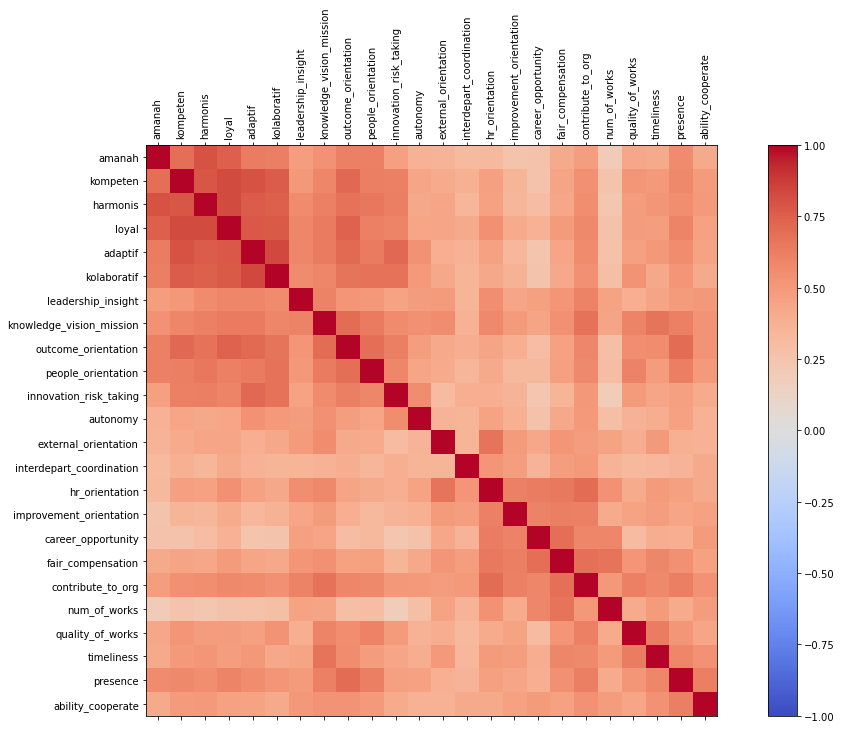

,amanah,kompeten,harmonis,loyal,adaptif,kolaboratif,leadership_insight,knowledge_vision_mission,outcome_orientation,people_orientation,...,hr_orientation,improvement_orientation,career_opportunity,fair_compensation,contribute_to_org,num_of_works,quality_of_works,timeliness,presence,ability_cooperate
amanah,1.000000,0.692425,0.798217,0.743199,0.630671,0.624944,0.475708,0.537173,0.613690,0.609762,...,0.321191,0.256120,0.259873,0.410507,0.474535,0.191795,0.422032,0.410255,0.564909,0.409412
kompeten,0.692425,1.000000,0.782429,0.822660,0.804641,0.764874,0.500452,0.591186,0.717614,0.620886,...,0.463860,0.344416,0.264495,0.441526,0.546421,0.253817,0.512266,0.496240,0.576669,0.490337
harmonis,0.798217,0.782429,1.000000,0.823417,0.762821,0.747067,0.567026,0.614131,0.672955,0.650994,...,0.456160,0.336497,0.296823,0.425315,0.553378,0.226704,0.484108,0.512654,0.553031,0.494526
loyal,0.743199,0.822660,0.823417,1.000000,0.777629,0.769909,0.593108,0.633980,0.741566,0.613245,...,0.544158,0.405102,0.362794,0.489776,0.574843,0.260325,0.477566,0.473078,0.595204,0.460094
adaptif,0.630671,0.804641,0.762821,0.777629,1.000000,0.832441,0.581328,0.633023,0.707489,0.634754,...,0.457698,0.330792,0.247411,0.436764,0.565005,0.271572,0.466559,0.507640,0.560606,0.446105
kolaboratif,0.624944,0.764874,0.747067,0.769909,0.832441,1.000000,0.566224,0.582905,0.669175,0.674342,...,0.414071,0.368524,0.257005,0.417399,0.544849,0.284936,0.530930,0.421114,0.518836,0.411705
leadership_insight,0.475708,0.500452,0.567026,0.593108,0.581328,0.566224,1.000000,0.604037,0.522026,0.501101,...,0.554336,0.433986,0.463750,0.519568,0.608423,0.445962,0.389453,0.442960,0.484765,0.502438
knowledge_vision_mission,0.537173,0.591186,0.614131,0.633980,0.633023,0.582905,0.604037,1.000000,0.698806,0.637912,...,0.576992,0.484860,0.441771,0.543837,0.678830,0.439769,0.601551,0.667288,0.611244,0.526751
outcome_orientation,0.613690,0.717614,0.672955,0.741566,0.707489,0.669175,0.522026,0.698806,1.000000,0.690009,...,0.439450,0.385990,0.292256,0.457674,0.584722,0.281252,0.553945,0.554848,0.698683,0.526982
people_orientation,0.609762,0.620886,0.650994,0.613245,0.634754,0.674342,0.501101,0.637912,0.690009,1.000000,...,0.411525,0.325438,0.320917,0.464305,0.574306,0.289822,0.605228,0.483633,0.619343,0.497688


In [20]:
## check correlation between subgroups
corr = df_new.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(df_new.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(df_new.columns)
ax.set_yticklabels(df_new.columns)
fig.set_size_inches(18.5, 10.5)
plt.show()
df_new.corr()

In [21]:
## create new dataframe to group subgroups into main groups
df_new2 = pd.DataFrame()
df_new2['shared_values'] = df_net[[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]].mean(axis=1)
df_new2['leadership_style'] = df_net[[19,20]].mean(axis=1)
df_new2['organizational_culture'] = df_net[[21,22,23,24,25]].mean(axis=1)
df_new2['perception_of_organizational_practices'] = df_net[[26,27,28,29,30]].mean(axis=1)
df_new2['employee_motivation'] = df_net[[31,32,33,34,35]].mean(axis=1)
df_new2['employee_performance_results'] = df_net[[36,37,38,39,40]].mean(axis=1)

In [22]:
df_new2.head()

,shared_values,leadership_style,organizational_culture,perception_of_organizational_practices,employee_motivation,employee_performance_results
0,3.722222,3.5,4.0,3.4,3.2,4.0
1,4.000000,4.0,3.8,3.6,4.0,4.0
2,5.000000,5.0,4.6,4.2,3.8,4.2
3,5.000000,5.0,5.0,5.0,5.0,5.0
4,4.500000,4.0,5.0,3.8,3.0,3.8


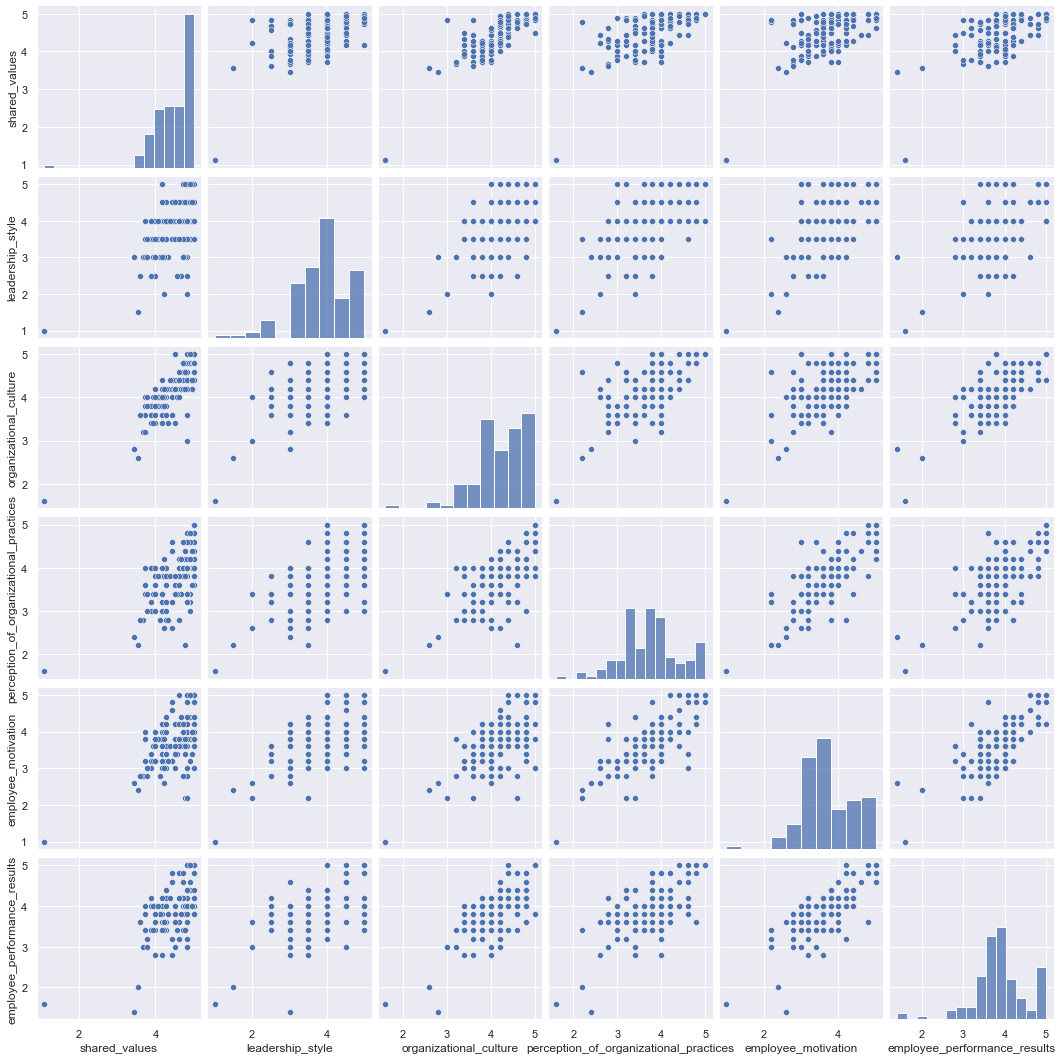

In [27]:
## checking the pairplot between main groups
sns.pairplot(df_new2)

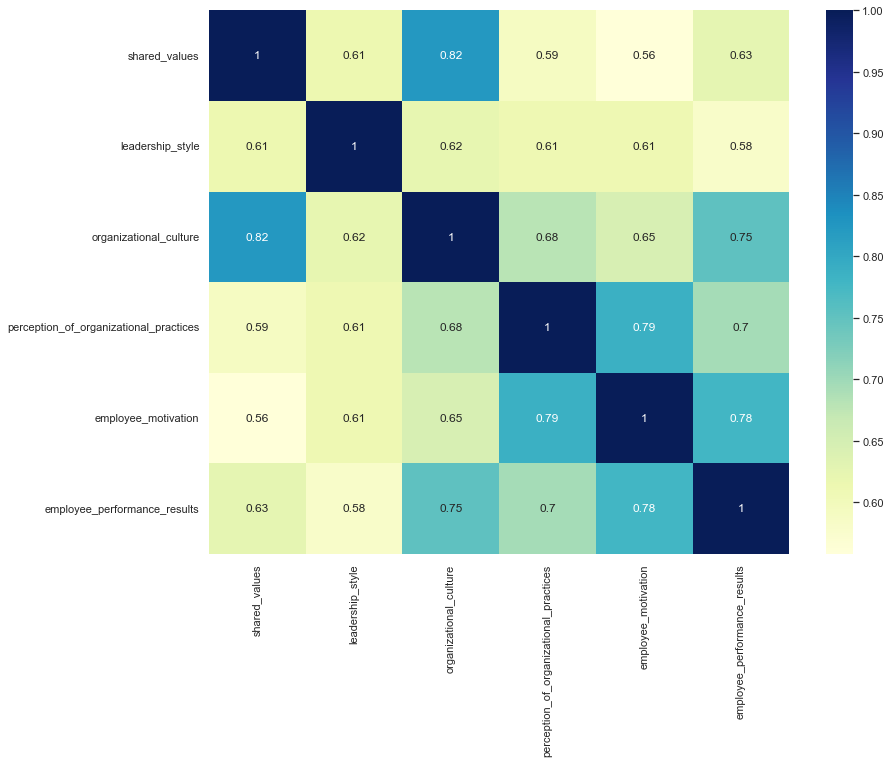

In [24]:
## check correlation between subgroups
import seaborn as sns
sns.set(rc={'figure.figsize':(13,10)})
dataplot = sns.heatmap(df_new2.corr(), cmap="YlGnBu", annot=True)
plt.show()

In [26]:
# Determining statistical significance, *** 99% confidence intervals, ** 95% confidence intervals, * 90% confidence intervals

from scipy.stats import pearsonr
import numpy as np
rho = df_new2.corr()
pval = df_new2.corr(method=lambda x, y: pearsonr(x, y)[1]) - np.eye(*rho.shape)
p = pval.applymap(lambda x: ''.join(['*' for t in [0.001, 0.01, 0.05] if x<=t]))
rho.round(2).astype(str) + p

,shared_values,leadership_style,organizational_culture,perception_of_organizational_practices,employee_motivation,employee_performance_results
shared_values,1.0***,0.61***,0.82***,0.59***,0.56***,0.63***
leadership_style,0.61***,1.0***,0.62***,0.61***,0.61***,0.58***
organizational_culture,0.82***,0.62***,1.0***,0.68***,0.65***,0.75***
perception_of_organizational_practices,0.59***,0.61***,0.68***,1.0***,0.79***,0.7***
employee_motivation,0.56***,0.61***,0.65***,0.79***,1.0***,0.78***
employee_performance_results,0.63***,0.58***,0.75***,0.7***,0.78***,1.0***


Looking into employee performance results correlation to all main groups, all main groups are having positive correlation with 99% significance testing results

#### Checking Internal Consistency using Cronbach Alpha

In [30]:
# calculating internal consistency using cronbach alpha

def cronbach_alpha(df):
    # 1. Transform the df into a correlation matrix
    df_corr = df.corr()
    
    # 2.1 Calculate N
    # The number of variables equals the number of columns in the df
    N = df.shape[1]
    
    # 2.2 Calculate R
    # For this, we'll loop through the columns and append every
    # relevant correlation to an array calles "r_s". Then, we'll
    # calculate the mean of "r_s"
    rs = np.array([])
    for i, col in enumerate(df_corr.columns):
        sum_ = df_corr[col][i+1:].values
        rs = np.append(sum_, rs)
    mean_r = np.mean(rs)
    
   # 3. Use the formula to calculate Cronbach's Alpha 
    cronbach_alpha = (N * mean_r) / (1 + (N - 1) * mean_r)
    return cronbach_alpha

cronbach_alpha(df_new2)

0.9225646843279093

In [31]:
import pingouin as pg
# Cronbach Alpha Summary and its confidence interfals
print('Cronbach Alpha Summary - Result and 95% confidence intervals:',end='\n\n')
print('All Questions = ',pg.cronbach_alpha(df_net))
print('Shared Values = ',pg.cronbach_alpha(df_net[[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]]))
print('Leadership Style = ',pg.cronbach_alpha(df_net[[19,20]]))
print('Organizational Culture = ',pg.cronbach_alpha(df_net[[21,22,23,24,25]]))
print('Perception of Organizational Practices = ',pg.cronbach_alpha(df_net[[26,27,28,29,30]]))
print('Employee Motivation = ',pg.cronbach_alpha(df_net[[31,32,33,34,35]]))
print('Employee Performance Results = ',pg.cronbach_alpha(df_net[[36,37,38,39,40]]))

Cronbach Alpha Summary - Result and 95% confidence intervals:

All Questions =  (0.9694797712417471, array([0.961, 0.977]))
Shared Values =  (0.9632388898573799, array([0.953, 0.972]))
Leadership Style =  (0.8030178459157518, array([0.719, 0.862]))
Organizational Culture =  (0.8681539551503202, array([0.828, 0.901]))
Perception of Organizational Practices =  (0.8134831460674157, array([0.756, 0.861]))
Employee Motivation =  (0.8636864242073895, array([0.822, 0.898]))
Employee Performance Results =  (0.8356396063960637, array([0.785, 0.877]))


from the results, as scores are above 80, all questions within main groups are having strong consistency